In [4]:
%matplotlib inline
from datetime import datetime
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read csv-file
games = pd.read_csv('games.csv')
games.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Stanislav Cherchesov,Unai Emery,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,Akhmat Grozny,Spartak Moscow,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Andrey Kobelev,Rustem Khuzin,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Leonid Slutski,Dan Petrescu,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,CSKA Moscow,Dynamo Moscow,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,Slaven Bilic,Kurban Berdyev,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,Lokomotiv Moscow,Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,Andrey Kobelev,Gadzhi Gadzhiev,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league


In [8]:
# Retrieve all English Premier League football clubs names
gdf = games.competition_id == 'GB1'
gdf = games.loc[gdf]
gdf.home_club_name.unique()

array(['Southampton FC', 'Fulham FC', 'Aston Villa', 'West Ham United',
       'West Bromwich Albion', 'Sunderland AFC', 'Chelsea FC',
       'Reading FC', 'Norwich City', 'Arsenal FC', 'Manchester City',
       'Liverpool FC', 'Everton FC', 'Crystal Palace', 'Newcastle United',
       'Swansea City', 'Hull City', 'AFC Bournemouth', 'Leicester City',
       'Watford FC', 'Manchester United', 'Huddersfield Town',
       'Tottenham Hotspur', 'Queens Park Rangers',
       'Brighton & Hove Albion', 'Wolverhampton Wanderers',
       'Sheffield United', 'Leeds United', 'Brentford FC',
       'Nottingham Forest', 'Cardiff City', 'Middlesbrough FC',
       'Burnley FC', 'Wigan Athletic', 'Stoke City'], dtype=object)

In [10]:
# Retrieve DataFrame columns
gdf.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [12]:
# Retrieve Manchester United's statistics for the season 2018 (home and away games)
mu_2018_s = (gdf.home_club_name == 'Manchester United') & (gdf.season == 2018) | (gdf.away_club_name == 'Manchester United') & (gdf.season == 2018)

In [14]:
# Sort all records by date
mu_2018 = gdf.loc[mu_2018_s].sort_values(by=['season', 'date'])
mu_2018.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [16]:
# Retrieve home and away games
home_games = mu_2018.loc[mu_2018.home_club_name == 'Manchester United']
away_games = mu_2018.loc[mu_2018.away_club_name == 'Manchester United']

In [18]:
home_games.home_club_goals.describe()

count    19.000000
mean      1.736842
std       1.326738
min       0.000000
25%       0.500000
50%       2.000000
75%       2.500000
max       4.000000
Name: home_club_goals, dtype: float64

In [20]:
# Total goals scored at Old Trafford
home_goals_scored_total = home_games.home_club_goals.sum()
home_goals_scored_total

33

In [22]:
# Maximum goals Man Utd scored at OT
home_goals_scored_max = home_games.home_club_goals.max()
home_goals_scored_max

4

In [24]:
home_goals_scored_max_games = home_games.loc[home_games.home_club_goals == home_games.home_club_goals.max()]
home_goals_scored_max_games
# There are 2 games, when MU scored 4 goals at OT

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_name,away_club_name,aggregate,competition_type
49815,3050324,GB1,2018,16. Matchday,2018-12-08,985,931,4,1,6.0,...,José Mourinho,Claudio Ranieri,Old Trafford,74523.0,Lee Probert,https://www.transfermarkt.co.uk/manchester-uni...,Manchester United,Fulham FC,4:1,domestic_league
1914,3050353,GB1,2018,20. Matchday,2018-12-30,985,989,4,1,6.0,...,Ole Gunnar Solskjaer,Eddie Howe,Old Trafford,74556.0,Lee Mason,https://www.transfermarkt.co.uk/manchester-uni...,Manchester United,AFC Bournemouth,4:1,domestic_league


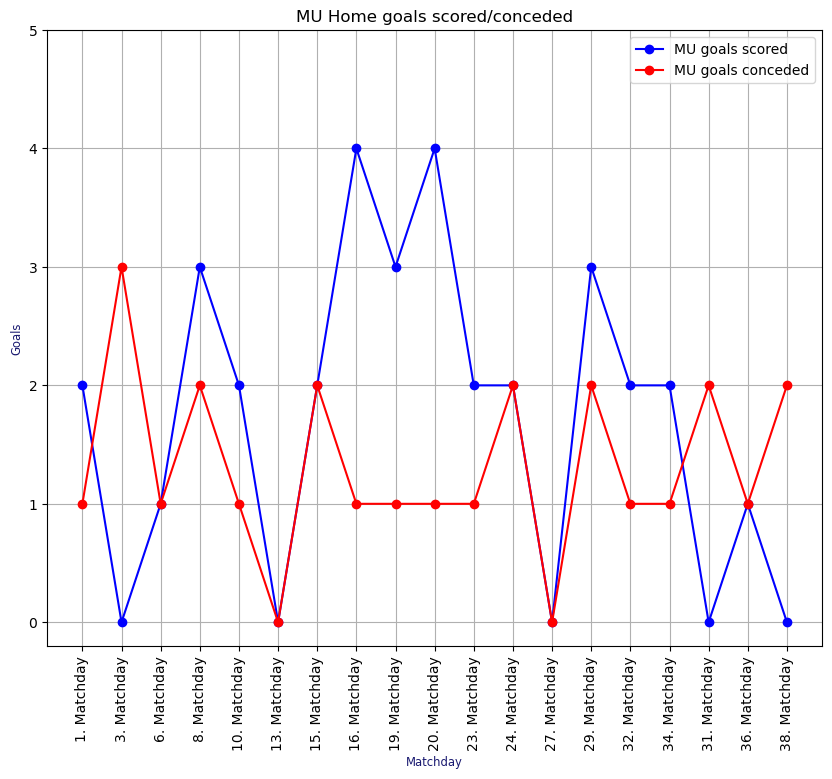

In [26]:
home_goals_scored_per_game = home_games.home_club_goals
rounds = home_games['round']
home_goals_conceded_per_game = home_games.away_club_goals

plt.figure(figsize=(10, 8))
plt.plot(rounds, home_goals_scored_per_game, "b-o", label='MU goals scored')
plt.plot(rounds, home_goals_conceded_per_game, "r-o", label='MU goals conceded')
plt.title("MU Home goals scored/conceded")
plt.xticks(rotation=90)
plt.xlabel("Matchday", fontsize="small", color="midnightblue")
plt.ylabel("Goals", fontsize="small", color="midnightblue")
plt.yticks(np.arange(0, 6, step=1))
plt.legend()
plt.grid()
plt.show()

In [28]:
away_games.away_club_goals.describe()

count    19.000000
mean      1.684211
std       1.157230
min       0.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       5.000000
Name: away_club_goals, dtype: float64

In [30]:
# Total goals scored away
away_goals_scored_total = away_games.away_club_goals.sum()
away_goals_scored_total

32

In [32]:
# Maximum goals Man Utd scored away
away_goals_scored_max = away_games.away_club_goals.max()
away_goals_scored_max

5

In [34]:
away_goals_scored_max_games = away_games.loc[away_games.away_club_goals == away_games.away_club_goals.max()]
away_goals_scored_max_games

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_name,away_club_name,aggregate,competition_type
12757,3050339,GB1,2018,18. Matchday,2018-12-22,603,985,1,5,17.0,...,Neil Warnock,Ole Gunnar Solskjaer,Cardiff City Stadium,33028.0,Michael Oliver,https://www.transfermarkt.co.uk/cardiff-city_m...,Cardiff City,Manchester United,1:5,domestic_league


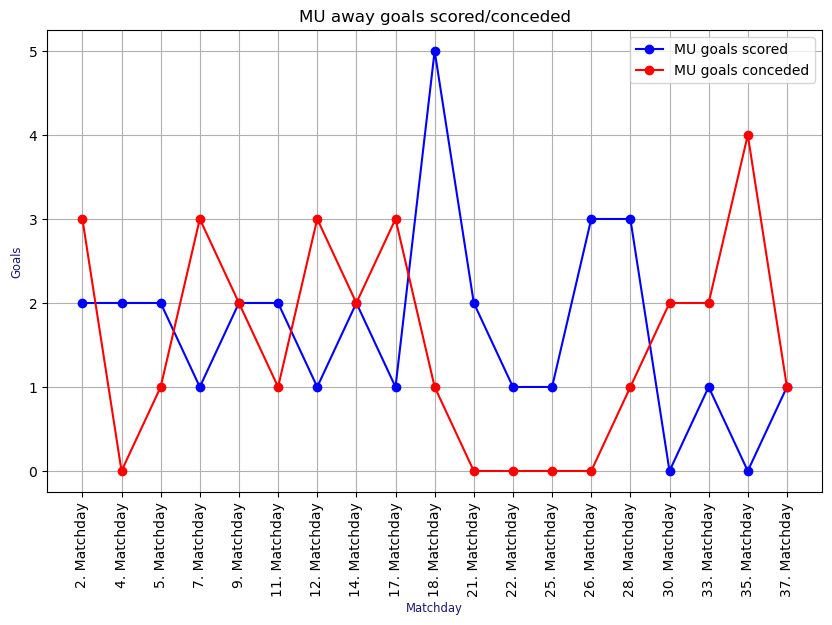

In [36]:
away_goals_scored_per_game = away_games.away_club_goals
rounds = away_games['round']
away_goals_conceded_per_game = away_games.home_club_goals

plt.figure(figsize=(10, 6))
plt.plot(rounds, away_goals_scored_per_game, "b-o", label='MU goals scored')
plt.plot(rounds, away_goals_conceded_per_game, "r-o", label='MU goals conceded')
plt.title("MU away goals scored/conceded")
plt.xticks(rotation=90)
plt.xlabel("Matchday", fontsize="small", color="midnightblue")
plt.ylabel("Goals", fontsize="small", color="midnightblue")
plt.yticks(np.arange(0, 6, step=1))
plt.legend()
plt.grid()
plt.show()

In [38]:
total_mu_scored_goals = away_goals_scored_total + home_goals_scored_total
total_mu_scored_goals

65

In [40]:
total_mu_conceded_goals = home_goals_conceded_per_game.sum() + away_goals_conceded_per_game.sum()
total_mu_conceded_goals

54

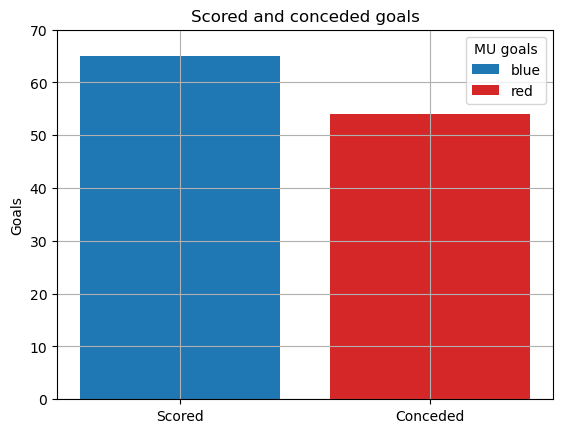

In [42]:
s_c_goals = ['Scored', 'Conceded']
counts = [total_mu_scored_goals, total_mu_conceded_goals]
bar_labels = ['blue', 'red']
bar_colors = ['tab:blue', 'tab:red']

plt.bar(s_c_goals, counts, label=bar_labels, color=bar_colors)
plt.ylabel('Goals')
plt.title('Scored and conceded goals')
plt.legend(title='MU goals')
plt.yticks(np.arange(0, 71, step=10))
plt.grid()
plt.show()

In [44]:
# Created new DF with all goals MU scored and conceded
all_dates = pd.concat([home_games['date'], away_games['date']])
all_goals_scored = pd.concat([home_games.home_club_goals, away_games.away_club_goals])
all_goals_conceded = pd.concat([home_games.away_club_goals, away_games.home_club_goals])
all_rounds = pd.concat([home_games['round'], away_games['round']])
all_g_r = pd.concat([all_goals_scored, all_goals_conceded, all_rounds, all_dates], axis=1)
all_g_r.columns = ['scored', 'conceded', 'matchday', 'date']
all_g_r.sort_values(by=['date'], inplace=True)

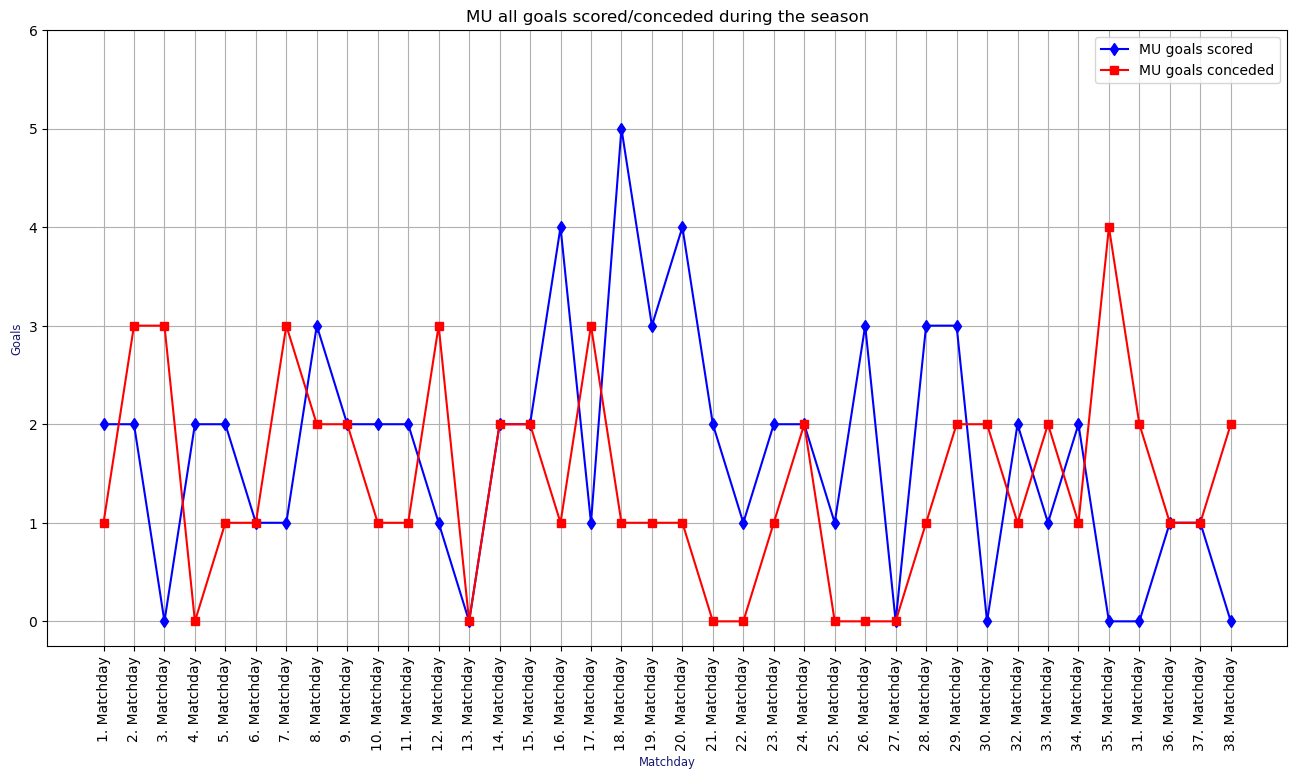

In [46]:
plt.figure(figsize=(16, 8))
plt.plot(all_g_r.matchday, all_g_r['scored'], "b-d", label='MU goals scored')
plt.plot(all_g_r.matchday, all_g_r['conceded'], "r-s", label='MU goals conceded')
plt.title("MU all goals scored/conceded during the season")
plt.xticks(rotation=90)
plt.xlabel("Matchday", fontsize="small", color="midnightblue")
plt.ylabel("Goals", fontsize="small", color="midnightblue")
plt.yticks(np.arange(0, 7, step=1))
plt.legend()
plt.grid()
plt.show()

In [47]:
def get_games_victories(dataframe):
    victories = 0
    draws = 0
    loses = 0
    for row in dataframe.values:
        if row[0] >= row[1]:
            victories += 1
        if row[0] == row[1]:
            draws += 1
        if row[0] <= row[1]:
            loses += 1
    return victories, draws, loses
        
victories, draws, loses = get_games_victories(all_g_r)

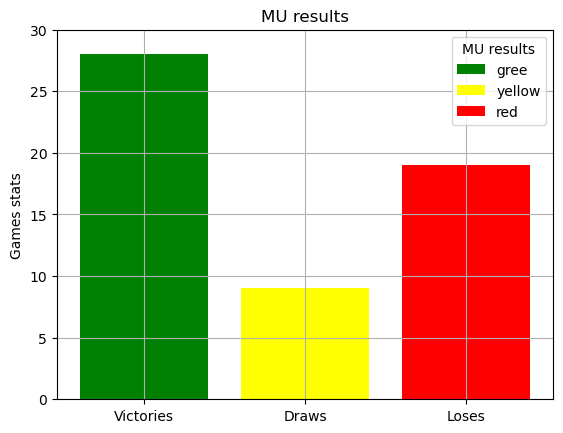

In [49]:
s_c_goals = ['Victories', 'Draws', 'Loses']
counts = [victories, draws, loses]
bar_labels = ['gree', 'yellow', 'red']
bar_colors = ['green', 'yellow', 'red']

plt.bar(s_c_goals, counts, label=bar_labels, color=bar_colors)
plt.ylabel('Games stats')
plt.title('MU results')
plt.legend(title='MU results')
plt.yticks(np.arange(0, 31, step=5))
plt.grid()
plt.show()

In [52]:
# Find a MU game with the most goals

def sum_goals(row):
    row['total_g'] = row[['scored', 'conceded']].sum()
    return row

all_g_r = all_g_r.apply(sum_goals, axis=1)
all_g_r.loc[all_g_r.total_g == all_g_r.total_g.max()].index
mu_2018.loc[12757]

game_id                                                             3050339
competition_id                                                          GB1
season                                                                 2018
round                                                          18. Matchday
date                                                             2018-12-22
home_club_id                                                            603
away_club_id                                                            985
home_club_goals                                                           1
away_club_goals                                                           5
home_club_position                                                     17.0
away_club_position                                                      6.0
home_club_manager_name                                         Neil Warnock
away_club_manager_name                                 Ole Gunnar Solskjaer
stadium     

In [54]:
# All MU stats for the season 2018
pos_18 = pd.concat([home_games.home_club_position, away_games.away_club_position])
date_18 = pd.concat([home_games.date, away_games.date])
p_d = pd.concat([pos_18, date_18], axis=1)
p_d.columns=['position', 'date']
p_d
# Converting object type to datetime type
p_d.date = pd.to_datetime(p_d.date, format='%Y-%m-%d')
# Sorting all rows by date
p_d.sort_values(by='date', inplace=True)

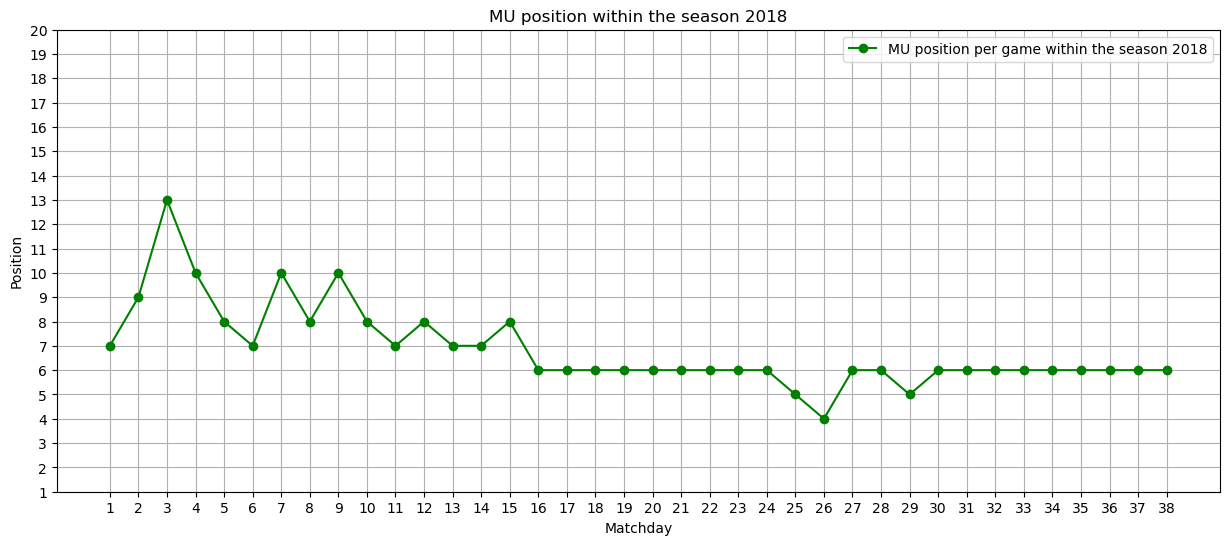

In [56]:
plt.close('all')
plt.figure(figsize=(15, 6))
plt.plot([i for i in range(1, 39)], p_d.position, 'g-o', label='MU position per game within the season 2018')
plt.xticks(np.arange(1, 39, step=1))
plt.yticks(np.arange(1, 21, step=1))
plt.title('MU position within the season 2018')
plt.xlabel('Matchday')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()